In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4. Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3_Aprendizaje supervisado/bank_marketing_RETO_DS_AS.csv")

5. Obtén la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable y la cantidad de datos perdidos de cada variable en caso de que existan.
* Se cuenta con 17 campos
* Se cuenta en valores numericos y categoricos
* No se evidencia datos perdidos

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [5]:
data.nunique()

age            74
job            12
marital         3
education       4
default         2
balance      3476
housing         2
loan            2
contact         3
day            31
month          12
duration     1327
campaign       34
pdays         437
previous       31
poutcome        4
y               2
dtype: int64

6. Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.

* Para el caso de los campos categoricos con varios valores se utilizará OneHotEncoder para que los valores despues de la transformacion sean solo de 1 y 0
* Para el caso de los campos con valores Yes y No se utilizará LabelEncoder por el facilismo de la transfromacion a valores de 0 y 1

In [6]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [7]:
#job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
job = encoder.fit_transform(data.job.values.reshape(-1, 1)).toarray()
data = pd.concat([
    data.drop("job", axis = 1),
    pd.DataFrame(job, columns = "job_"+encoder.categories_[0])
], axis = 1)

# marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
marital = encoder.fit_transform(data.marital.values.reshape(-1, 1)).toarray()
data = pd.concat([
    data.drop("marital", axis = 1),
    pd.DataFrame(marital, columns = "marital_"+encoder.categories_[0])
], axis = 1)

# education (categorical: "unknown","secondary","primary","tertiary")
education = encoder.fit_transform(data.education.values.reshape(-1, 1)).toarray()
data = pd.concat([
    data.drop("education", axis = 1),
    pd.DataFrame(education, columns = "education_"+encoder.categories_[0])
], axis = 1)

# contact: contact communication type (categorical: "unknown","telephone","cellular")
contact = encoder.fit_transform(data.contact.values.reshape(-1, 1)).toarray()
data = pd.concat([
    data.drop("contact", axis = 1),
    pd.DataFrame(contact, columns = "contact_"+encoder.categories_[0])
], axis = 1)

# month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
month = encoder.fit_transform(data.month.values.reshape(-1, 1)).toarray()
data = pd.concat([
    data.drop("month", axis = 1),
    pd.DataFrame(month, columns = "month_"+encoder.categories_[0])
], axis = 1)

# poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
poutcome = encoder.fit_transform(data.poutcome.values.reshape(-1, 1)).toarray()
data = pd.concat([
    data.drop("poutcome", axis = 1),
    pd.DataFrame(poutcome, columns = "poutcome_"+encoder.categories_[0])
], axis = 1)

In [8]:
from sklearn.preprocessing import LabelEncoder

# default: has credit in default? (binary: "yes","no")
# housing: has housing loan? (binary: "yes","no")
# loan: has personal loan? (binary: "yes","no")
# y - has the client subscribed a term deposit? (binary: "yes","no")
le = LabelEncoder()
cols = ['default','housing','loan','y']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9000 non-null   int64  
 1   default              9000 non-null   int64  
 2   balance              9000 non-null   int64  
 3   housing              9000 non-null   int64  
 4   loan                 9000 non-null   int64  
 5   day                  9000 non-null   int64  
 6   duration             9000 non-null   int64  
 7   campaign             9000 non-null   int64  
 8   pdays                9000 non-null   int64  
 9   previous             9000 non-null   int64  
 10  y                    9000 non-null   int64  
 11  job_admin.           9000 non-null   float64
 12  job_blue-collar      9000 non-null   float64
 13  job_entrepreneur     9000 non-null   float64
 14  job_housemaid        9000 non-null   float64
 15  job_management       9000 non-null   f

7. Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

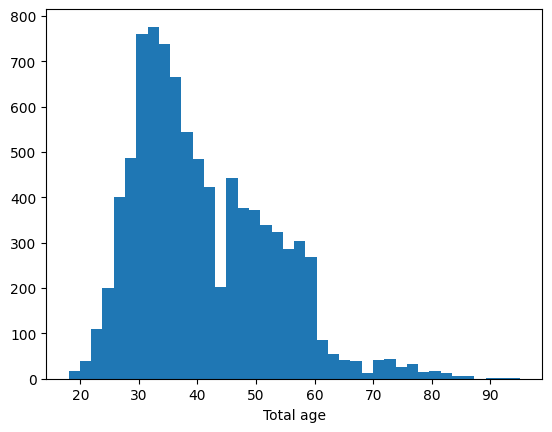

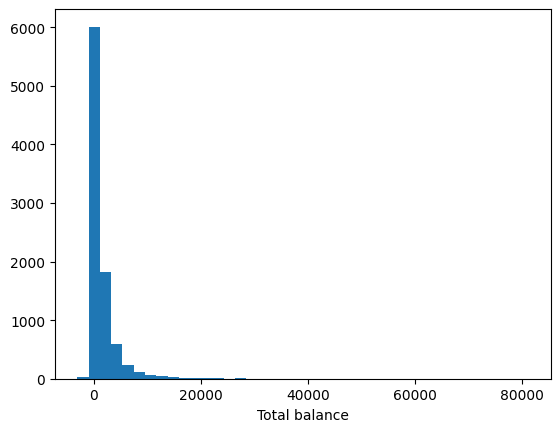

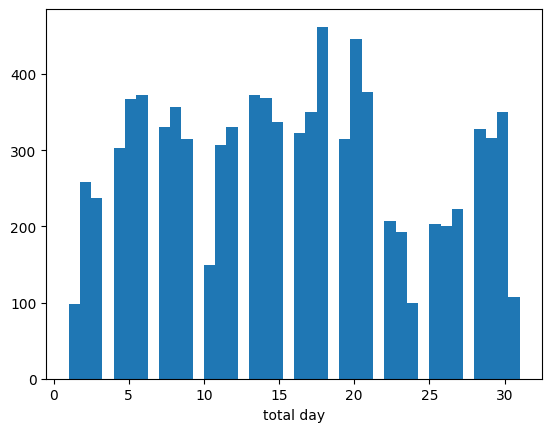

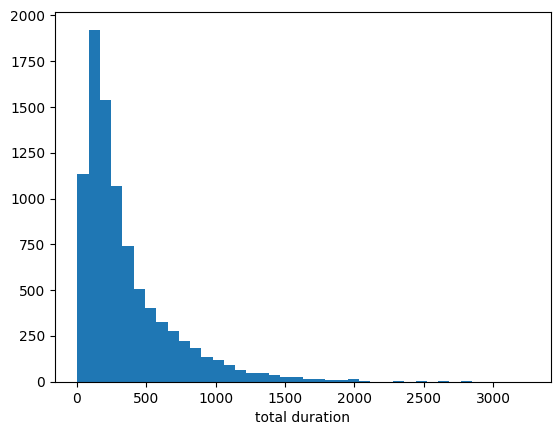

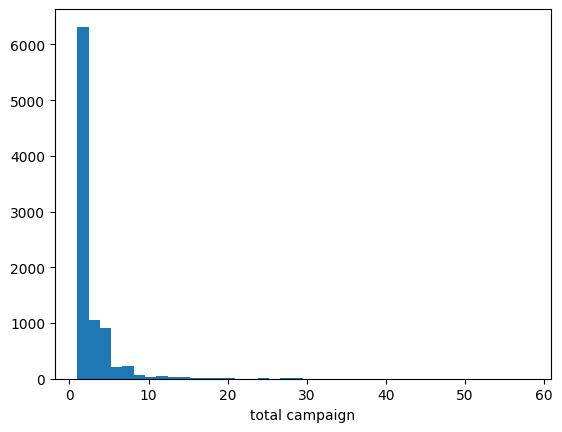

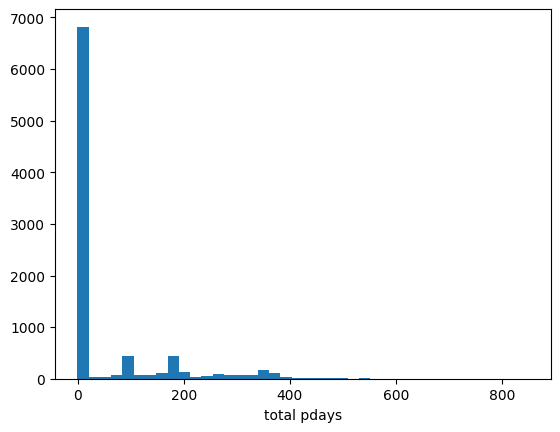

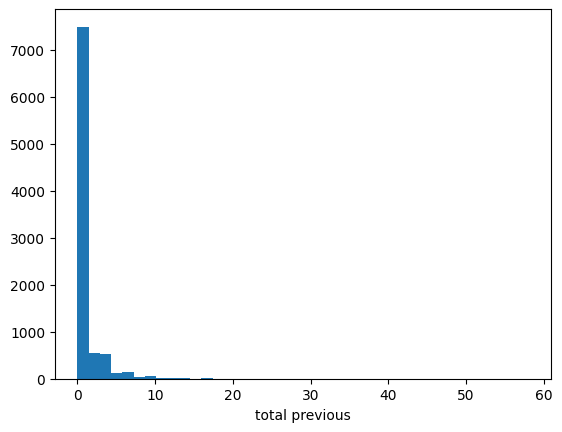

In [11]:
total_age=np.array(data["age"])
plt.hist(total_age,bins=40)
plt.xlabel("Total age")
plt.show()

total_balance=np.array(data["balance"])
plt.hist(total_balance,bins=40)
plt.xlabel("Total balance")
plt.show()

total_day=np.array(data["day"])
plt.hist(total_day,bins=40)
plt.xlabel("total day")
plt.show()

total_duration=np.array(data["duration"])
plt.hist(total_duration,bins=40)
plt.xlabel("total duration")
plt.show()

total_campaign=np.array(data["campaign"])
plt.hist(total_campaign,bins=40)
plt.xlabel("total campaign")
plt.show()

total_pdays=np.array(data["pdays"])
plt.hist(total_pdays,bins=40)
plt.xlabel("total pdays")
plt.show()

total_previous=np.array(data["previous"])
plt.hist(total_previous,bins=40)
plt.xlabel("total previous")
plt.show()

In [12]:
# Correccion de Sesgo Positivo
def transformacionLogaritmica(X):
  return np.log(X+1)

def estandar_1(X):
  return (X-np.mean(X))/np.std(X)

def estandar_2(X):
	return (X - np.min(X)) / (np.max(X) - np.min(X))

considero que el unico campo que requiere ser ajustado es el campo Duration porque es el que presenta mas valores dispersos a los otros campos

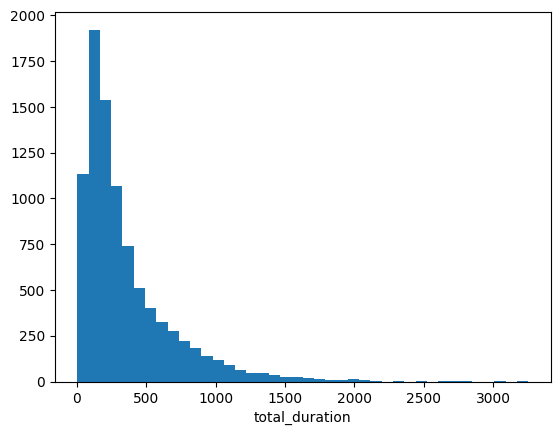

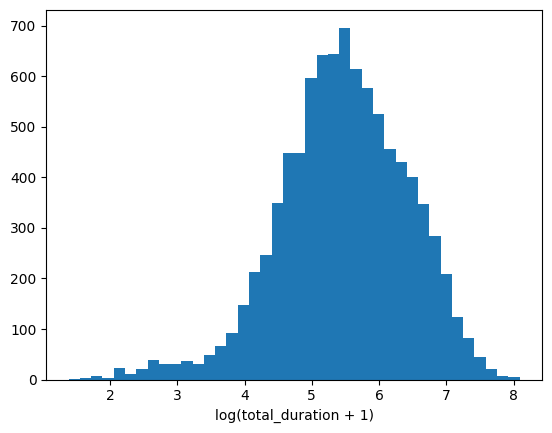

In [13]:
total_duration=np.array(data["duration"])
plt.hist(total_duration,bins=40)
plt.xlabel("total_duration")
plt.show()

plt.hist(transformacionLogaritmica(total_duration),bins=40)
plt.xlabel("log(total_duration + 1)")
plt.show()

In [14]:
data['duration_log']=transformacionLogaritmica(total_duration)
data=data.drop(["duration"],axis=1)

8. Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.

In [16]:
X = data[['age','default','balance','housing','loan','day','campaign','pdays','previous','job_admin.','job_blue-collar',
          'job_entrepreneur','job_housemaid','job_management','job_retired', 'job_self-employed','job_services','job_student',
          'job_technician','job_unemployed','job_unknown','marital_divorced','marital_married','marital_single','education_primary',
          'education_secondary','education_tertiary','education_unknown','contact_cellular','contact_telephone','contact_unknown',
          'month_apr','month_aug','month_dec','month_feb','month_jan','month_jul','month_jun','month_mar','month_may','month_nov',
          'month_oct','month_sep','poutcome_failure','poutcome_other','poutcome_success','poutcome_unknown','duration_log']]
Y = data['y']
X = X.values
Y = Y.values

In [17]:
print('Porcentaje de clientes que adquieren el producto: %.1f' % (100*sum(Y) / Y.shape[0]))
print('Porcentaje de clientes que no adquieren el producto: %.1f' % (100* (1-sum(Y) / Y.shape[0])))

Porcentaje de clientes que adquieren el producto: 42.1
Porcentaje de clientes que no adquieren el producto: 57.9


In [18]:
from sklearn.model_selection import train_test_split

9. Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [21]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, Y,train_size=.60)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test,y_validation_and_test, test_size=.50)

10. Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

REGRESION LOGISTICA

In [19]:
from sklearn.linear_model import LogisticRegression

In [23]:
modelo_RL_hyper = LogisticRegression(C=.1, penalty='l2', solver='lbfgs',
                                      max_iter=10000)
modelo_RL_hyper.fit( x_train, np.ravel(y_train) )
print('exactitud: %0.4f\n' % modelo_RL_hyper.score(x_test, y_test))

exactitud: 0.8167



In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = {'C':[0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
              'penalty':('l2','elasticnet', 'none'),
              'solver':('newton-cg','saga','lbfgs','sag')}

In [26]:
RL_grid = LogisticRegression(max_iter=10000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)

modelo_RL_grid.fit(x_train, np.ravel(y_train))

print(modelo_RL_grid)

print("Los mejores valores encontrados son %s con un score de %0.2f"
      % (modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))

print(modelo_RL_grid.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ('l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'} con un score de 0.83
0.8233333333333334


In [27]:
modelo_grid_RL = LogisticRegression(C=0.1, penalty='none', solver='lbfgs', max_iter=10000)
modelo_grid_RL.fit( x_train, np.ravel(y_train) )
modelo_grid_RL.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


0.8233333333333334

 Matriz de confusión

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
pr = modelo_RL_hyper.predict(x_validation)
confusion_matrix(y_validation, pr)

array([[865, 181],
       [150, 604]])

In [32]:
pr_modelo_RL_hyper = modelo_RL_grid.predict(x_validation)
confusion_matrix(y_validation, pr_modelo_RL_hyper)

array([[870, 176],
       [153, 601]])

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

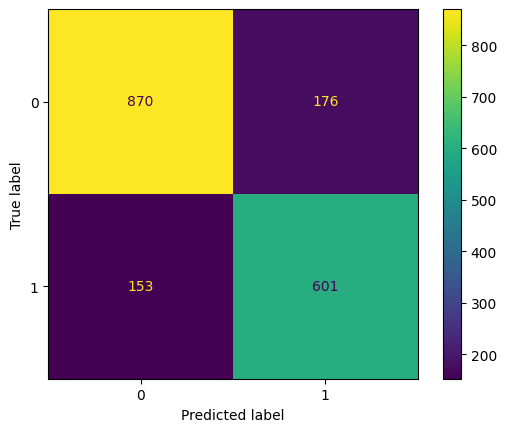

In [35]:
ConfusionMatrixDisplay.from_estimator(modelo_RL_grid, x_validation, y_validation)
plt.show()

11. Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
modelo_MLP = MLPClassifier(hidden_layer_sizes=(15), max_iter=10000, alpha=0.5, random_state=42)
modelo_MLP.fit(x_train, y_train)
modelo_MLP.score(x_test, y_test)

0.7583333333333333

In [38]:
parametersMLP = {'alpha':[0.4, 0.5, 0.6, 0.7],
              'hidden_layer_sizes':[10,15,20,25],
              'solver':('lbfgs','sgd','adam')}

In [39]:
MLP_grid = MLPClassifier(max_iter=10000)
modelo_MLP_grid = GridSearchCV(MLP_grid, parametersMLP)

modelo_MLP_grid.fit(x_train, np.ravel(y_train))

print(modelo_MLP_grid)

print("Los mejores valores encontrados son %s con un score de %0.2f"
      % (modelo_MLP_grid.best_params_, modelo_MLP_grid.best_score_))

print(modelo_MLP_grid.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of i

GridSearchCV(estimator=MLPClassifier(max_iter=10000),
             param_grid={'alpha': [0.4, 0.5, 0.6, 0.7],
                         'hidden_layer_sizes': [10, 15, 20, 25],
                         'solver': ('lbfgs', 'sgd', 'adam')})
Los mejores valores encontrados son {'alpha': 0.6, 'hidden_layer_sizes': 15, 'solver': 'lbfgs'} con un score de 0.76
0.5955555555555555


In [40]:
modelo_Grid_MLP = MLPClassifier(hidden_layer_sizes=(15), max_iter=10000, solver= 'lbfgs', alpha=0.6, random_state=42)
modelo_Grid_MLP.fit(x_train, y_train)
modelo_Grid_MLP.score(x_test, y_test)

0.7972222222222223

Matriz de Confusion

In [41]:
pr_MLP = modelo_MLP.predict(x_validation)
confusion_matrix(y_test, pr_MLP)

array([[706, 357],
       [489, 248]])

In [42]:
pr_Grid_MLP = modelo_Grid_MLP.predict(x_validation)
confusion_matrix(y_test, pr_Grid_MLP)

array([[602, 461],
       [421, 316]])

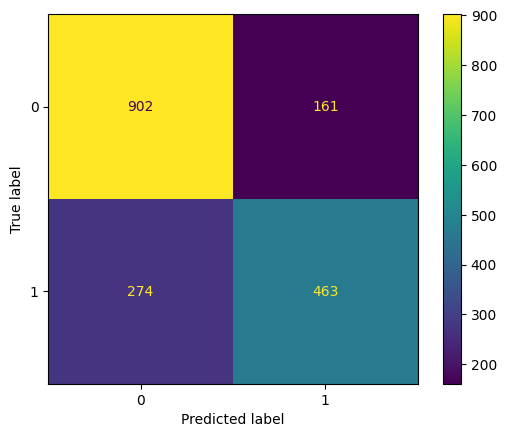

In [45]:
ConfusionMatrixDisplay.from_estimator(modelo_MLP, x_test, y_test, labels=[0,1])
plt.show()

12. Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.

Se seleccion el modelo de Regresion Lineal porque se obtiene mas aciertos en Verdaderos Negativos que se acerca mas a los porcentajes obtenidos de la base de datos

In [46]:
pr = modelo_RL_hyper.predict(x_validation)
confusion_matrix(y_validation, pr)

array([[865, 181],
       [150, 604]])

In [47]:
print('Porcentaje de clientes que adquieren el producto: %.1f' % (100*sum(Y) / Y.shape[0]))
print('Porcentaje de clientes que no adquieren el producto: %.1f' % (100* (1-sum(Y) / Y.shape[0])))

Porcentaje de clientes que adquieren el producto: 42.1
Porcentaje de clientes que no adquieren el producto: 57.9


13. Incluye tus conclusiones del problema, en particular, ¿qué puedes decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?

Los modelos de apredizaje supervisado nos permiten realizar predicciones de acontencimientos futuros en base a datos pasados, en el caso del reto nos ayudan a determinar si una campaña va a ser adquirida por el cliente o no.